In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
PATH = r'data/200_species_train/'

In [3]:
def import_pics(base_path):
    all_pics = []
    all_labels = []
    for species in os.listdir(base_path):
        for tmp_pic in os.listdir(base_path+species):
            all_labels.append(species)
            all_pics.append(np.array(Image.open(base_path+species+"/"+tmp_pic)))
    return np.array(all_pics), np.array(all_labels)

In [4]:
X_train, y_train = import_pics(PATH)

### EDA

In [5]:
print(X_train.shape)
print(y_train.shape)

(27503, 224, 224, 3)
(27503,)


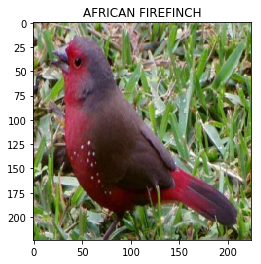

In [6]:
#example for a pic
plt.imshow(X_train[0])
plt.title(y_train[0]);

In [7]:
m, p1, p2 ,rgb = X_train.shape

X_train_flatten = X_train.reshape((m, p1*p2*rgb))

In [8]:
X_train_flatten.shape

(27503, 150528)

Taking a sample of 5 species of birds

In [9]:
labels_20 = list(np.unique(y_train)[:20])
index_20 = np.where([pd.Series(y_train).str.\
                     contains('|'.join(labels_20), regex=True)])[-1]

data_20 = X_train_flatten[index_20]
y_20 = y_train[index_20]

#### Dimensionality reduction:

ISOMAP

In [10]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=5, n_components=100)
#fit isomap
iso.fit(data_20)
#transform data
manifold_100D = iso.transform(data_20)

In [14]:
manifold_100D.shape

(2799, 100)

Splitting to train and test

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(manifold_100D, y_20, test_size=0.3, stratify=y_20)

Normalizing the data

In [107]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Predictions

K nearest neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
#fitting
model_knn.fit(X_train_sc, y_train)
#prediction
y_pred_knn = model_knn.predict(X_test_sc)

SVM RBF

In [128]:
from sklearn.svm import SVC

model_svm = SVC(C=0.5)
#fitting model
model_svm.fit(X_train_sc, y_train)
#prediction
y_pred_svm = model_svm.predict(X_test_sc)

Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
#fitting model
model_lr.fit(X_train_sc, y_train)
#prediction
y_pred_lr = model_lr.predict(X_test_sc)

Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=150)
#fitting model
model_rf.fit(X_train_sc, y_train)
#prediction
y_pred_rf = model_rf.predict(X_test_sc)

#### Metrics Phase

In [119]:
from sklearn.metrics import accuracy_score, classification_report

accuracy scores:

In [129]:
preds = [y_pred_knn, y_pred_lr, y_pred_rf, y_pred_svm]
names = ['Knn', 'Logistic Regression', 'Random Forest', 'SVM']

#calculating scores
accuracy_scores = [accuracy_score(y_test, pred) for pred in preds]

In [130]:
pd.DataFrame({'accuracy_score':accuracy_scores}, index=names)


,accuracy_score
Knn,0.220238
Logistic Regression,0.275000
Random Forest,0.279762
SVM,0.089286


Classifcation report for KNN:

In [123]:
print(classification_report(y_test, y_pred_knn))

                      precision    recall  f1-score   support

   AFRICAN FIREFINCH       0.15      0.33      0.21        42
           ALBATROSS       0.18      0.31      0.23        29
ALEXANDRINE PARAKEET       0.16      0.22      0.19        49
     AMERICAN AVOCET       0.23      0.41      0.29        54
    AMERICAN BITTERN       0.12      0.20      0.15        51
       AMERICAN COOT       0.51      0.53      0.52        47
  AMERICAN GOLDFINCH       0.41      0.38      0.39        40
    AMERICAN KESTREL       0.06      0.05      0.06        39
      AMERICAN PIPIT       0.14      0.19      0.16        54
   AMERICAN REDSTART       0.13      0.10      0.11        42
             ANHINGA       0.08      0.02      0.04        44
   ANNAS HUMMINGBIRD       0.11      0.10      0.10        42
             ANTBIRD       0.15      0.09      0.11        45
     ARARIPE MANAKIN       0.77      0.32      0.45        31
          BALD EAGLE       0.70      0.33      0.45        48
    BAL

Classifcation report for Logistic Regression:

In [124]:
print(classification_report(y_test, y_pred_lr))

                      precision    recall  f1-score   support

   AFRICAN FIREFINCH       0.30      0.33      0.32        42
           ALBATROSS       0.30      0.21      0.24        29
ALEXANDRINE PARAKEET       0.11      0.08      0.09        49
     AMERICAN AVOCET       0.29      0.43      0.35        54
    AMERICAN BITTERN       0.19      0.22      0.20        51
       AMERICAN COOT       0.59      0.64      0.61        47
  AMERICAN GOLDFINCH       0.34      0.60      0.43        40
    AMERICAN KESTREL       0.09      0.05      0.07        39
      AMERICAN PIPIT       0.10      0.19      0.13        54
   AMERICAN REDSTART       0.17      0.10      0.12        42
             ANHINGA       0.13      0.09      0.11        44
   ANNAS HUMMINGBIRD       0.19      0.10      0.13        42
             ANTBIRD       0.21      0.31      0.25        45
     ARARIPE MANAKIN       0.46      0.58      0.51        31
          BALD EAGLE       0.46      0.52      0.49        48
    BAL

Classifcation report for Random Forest:

In [126]:
print(classification_report(y_test, y_pred_rf))

                      precision    recall  f1-score   support

   AFRICAN FIREFINCH       0.34      0.26      0.30        42
           ALBATROSS       0.31      0.14      0.19        29
ALEXANDRINE PARAKEET       0.16      0.16      0.16        49
     AMERICAN AVOCET       0.30      0.46      0.37        54
    AMERICAN BITTERN       0.19      0.22      0.20        51
       AMERICAN COOT       0.50      0.60      0.54        47
  AMERICAN GOLDFINCH       0.38      0.42      0.40        40
    AMERICAN KESTREL       0.25      0.13      0.17        39
      AMERICAN PIPIT       0.13      0.30      0.18        54
   AMERICAN REDSTART       0.00      0.00      0.00        42
             ANHINGA       0.11      0.09      0.10        44
   ANNAS HUMMINGBIRD       0.15      0.12      0.13        42
             ANTBIRD       0.23      0.22      0.23        45
     ARARIPE MANAKIN       0.58      0.61      0.59        31
          BALD EAGLE       0.51      0.62      0.56        48
    BAL

Classifcation report for SVM:

In [131]:
print(classification_report(y_test, y_pred_svm))

                      precision    recall  f1-score   support

   AFRICAN FIREFINCH       0.00      0.00      0.00        42
           ALBATROSS       0.00      0.00      0.00        29
ALEXANDRINE PARAKEET       0.00      0.00      0.00        49
     AMERICAN AVOCET       0.11      0.70      0.19        54
    AMERICAN BITTERN       0.00      0.00      0.00        51
       AMERICAN COOT       0.00      0.00      0.00        47
  AMERICAN GOLDFINCH       0.00      0.00      0.00        40
    AMERICAN KESTREL       0.00      0.00      0.00        39
      AMERICAN PIPIT       0.08      0.69      0.14        54
   AMERICAN REDSTART       0.00      0.00      0.00        42
             ANHINGA       0.00      0.00      0.00        44
   ANNAS HUMMINGBIRD       0.00      0.00      0.00        42
             ANTBIRD       0.00      0.00      0.00        45
     ARARIPE MANAKIN       0.00      0.00      0.00        31
          BALD EAGLE       0.00      0.00      0.00        48
    BAL

C:\Users\dror\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
